In [185]:
import pandas as pd
import numpy as np
employed_population = pd.read_csv("data/DS_salary_factors.csv",
                    usecols=["GeoName","Total Employment in State/Area", "A_MEAN"]).set_index("GeoName", drop=True)
state_data_scientists = pd.read_csv("data/bls_all_data_M_2022_states.csv",
                    usecols=["AREA_TITLE","TOT_EMP", "A_MEAN"], na_values="**").set_index("AREA_TITLE", drop=True)
df  = pd.merge(employed_population, state_data_scientists, left_index=True, right_index=True)

In [196]:
pd.read_excel("data/all_data_M_2022.xlsx")

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,22.26,35.32,53.03,27340,33330,46310,73460,110290,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,51.62,78.71,106.03,50290,75350,107360,163710,220550,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,48.02,76.96,#,43440,62520,99890,160070,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,91.12,#,#,74920,122480,189520,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,91.12,#,#,74920,122480,189520,#,#,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409854,5000002,Northern Vermont nonmetropolitan area,6,VT,000000,Cross-industry,cross-industry,1235,53-7199,"Material Moving Workers, All Other",...,20.42,28.86,28.86,35710,35710,42470,60030,60030,NaN,NaN
409855,5500001,Northwestern Wisconsin nonmetropolitan area,6,WI,000000,Cross-industry,cross-industry,1235,53-7199,"Material Moving Workers, All Other",...,13.71,15,21.91,24840,27050,28510,31200,45570,NaN,NaN
409856,5500002,Northeastern Wisconsin nonmetropolitan area,6,WI,000000,Cross-industry,cross-industry,1235,53-7199,"Material Moving Workers, All Other",...,13.5,13.71,17.09,27040,27050,28080,28510,35550,NaN,NaN
409857,5500003,South Central Wisconsin nonmetropolitan area,6,WI,000000,Cross-industry,cross-industry,1235,53-7199,"Material Moving Workers, All Other",...,13.52,15.04,16.83,26390,26450,28120,31280,35010,NaN,NaN


In [190]:
state_data_scientists.A_MEAN.sort_values()

AREA_TITLE
Vermont                      *
South Carolina          100550
Florida                 100780
Maine                   101080
Texas                   102230
Hawaii                  103470
Alaska                  103810
Arizona                 104220
Georgia                 106400
South Dakota            108430
Illinois                109870
District of Columbia    110190
Connecticut             110220
Oregon                  111090
Minnesota               111740
Tennessee               112070
Colorado                116560
Rhode Island            117570
Maryland                118960
North Carolina          119960
Massachusetts           120340
New York                128200
Wyoming                 128860
New Jersey              129980
Delaware                133320
Virginia                133990
Washington              140780
California              147390
Puerto Rico              64910
Mississippi              65940
Louisiana                71710
West Virginia            725

In [45]:
indus = pd.read_csv("data/2022_oes_ds_st_indus.csv", usecols=["AREA_TITLE", "NAICS_TITLE", "I_GROUP", "TOT_EMP", "A_MEAN"], thousands=',')
indus = indus[indus["I_GROUP"]=="sector"]
indus["TOT_EMP"] = pd.to_numeric(indus["TOT_EMP"],
                                  "coerce")


In [46]:
df.columns = ["state_total_employment", "ds_mean_salary", "ds_total_employment"]

In [47]:
indus["weighted_ds_salary"] = indus["TOT_EMP"] * indus["A_MEAN"] 
indus


,AREA_TITLE,NAICS_TITLE,I_GROUP,TOT_EMP,A_MEAN,weighted_ds_salary
12,Alabama,Manufacturing,sector,30.0,83220.0,2496600.0
13,Alabama,Information,sector,60.0,70660.0,4239600.0
14,Alabama,Finance and Insurance,sector,80.0,80230.0,6418400.0
15,Alabama,"Professional, Scientific, and Technical Services",sector,640.0,98380.0,62963200.0
16,Alabama,Management of Companies and Enterprises,sector,50.0,103900.0,5195000.0
...,...,...,...,...,...,...
1560,Wisconsin,"Professional, Scientific, and Technical Services",sector,660.0,95360.0,62937600.0
1561,Wisconsin,Management of Companies and Enterprises,sector,370.0,105380.0,38990600.0
1562,Wisconsin,Administrative and Support and Waste Managemen...,sector,140.0,89120.0,12476800.0
1563,Wisconsin,Educational Services,sector,160.0,72310.0,11569600.0


In [48]:
salary = indus.groupby(["AREA_TITLE"])[["TOT_EMP", "weighted_ds_salary"]].sum()
salary = salary["weighted_ds_salary"]/salary["TOT_EMP"]
salary.name = "ds_mean_salary_imp"

In [50]:
df = df.merge(salary, left_index=True, right_index=True)

<Axes: >

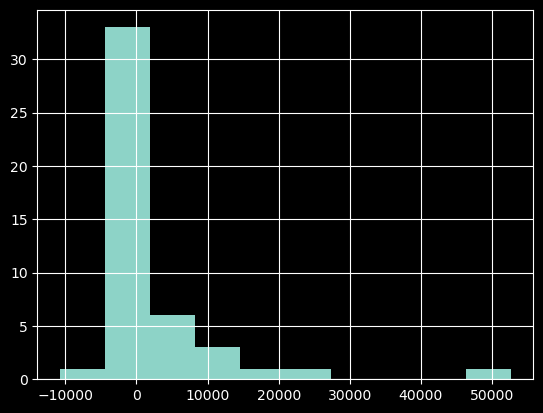

In [63]:
(df["ds_mean_salary"]-df["ds_mean_salary_imp"]).hist()

In [64]:
df.loc["Nevada", :]

state_total_employment    1.481776e+06
ds_mean_salary            9.687000e+04
ds_total_employment       8.500000e+02
ds_mean_salary_imp        4.421671e+04
Name: Nevada, dtype: float64

In [6]:
indus_piv = indus.pivot(index="AREA_TITLE", columns="NAICS_TITLE", values="TOT_EMP")

indus_state_sum =indus_piv.T.sum()
indus_state_sum.name="IND_EMP"

In [71]:
df.loc["Nevada", "ds_mean_salary"]

96870.0

In [67]:
indus[indus["AREA_TITLE"]=="Nevada"]

,AREA_TITLE,NAICS_TITLE,I_GROUP,TOT_EMP,A_MEAN,weighted_ds_salary
866,Nevada,Manufacturing,sector,40.0,116740.0,4669600.0
867,Nevada,Information,sector,NaN,122050.0,NaN
868,Nevada,Finance and Insurance,sector,130.0,103300.0,13429000.0
869,Nevada,"Professional, Scientific, and Technical Services",sector,380.0,NaN,NaN
870,Nevada,Management of Companies and Enterprises,sector,110.0,97610.0,10737100.0
871,Nevada,Educational Services,sector,40.0,52900.0,2116000.0


In [118]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer


imputer = IterativeImputer()

# indus = indus.drop(columns="I_GROUP")
indus["AREA_TITLE"] = pd.Categorical(indus["AREA_TITLE"])
indus["NAICS_TITLE"] = pd.Categorical(indus["NAICS_TITLE"])
categorical_transformer = Pipeline(steps=[
      ( 'onehot', OneHotEncoder(sparse_output=False) )
     ]
    )
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['AREA_TITLE', 'NAICS_TITLE']),
        ('num', "passthrough", ['TOT_EMP', 'A_MEAN'])
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', imputer)
    ]
)
X_imp = pipeline.fit_transform(indus )


In [130]:

cols = indus.columns[:4]

In [140]:
pred_vals = np.c_[pipeline.named_steps["preprocessor"]
         .named_transformers_['cat']
         .inverse_transform(X_imp[:, :-2]),
         X_imp[:, -2:]
]

indus2 = pd.DataFrame(data=pred_vals, columns=cols)

In [152]:
xy = pd.merge(indus, indus2, left_on=["AREA_TITLE", "NAICS_TITLE"],  right_on=["AREA_TITLE", "NAICS_TITLE"]
                                            
                                            )


In [162]:
miss = xy[xy.isna().any(axis=1)]

In [170]:
miss = miss.groupby("AREA_TITLE").apply(lambda x: x.isna().any()).any(axis=1)

/tmp/ipykernel_643701/2132109088.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  miss = miss.groupby("AREA_TITLE").apply(lambda x: x.isna().any()).any(axis=1)


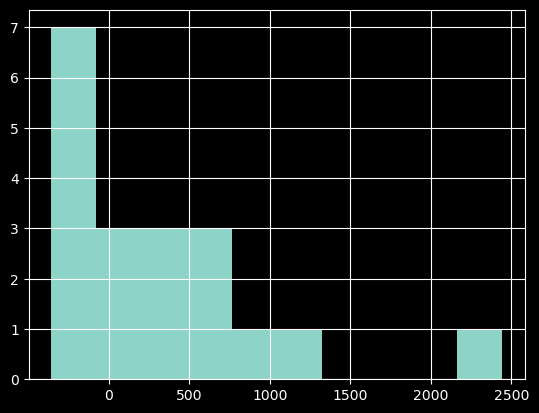

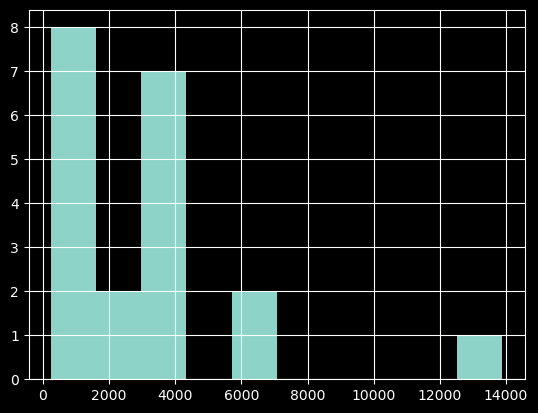

In [178]:
test = df.merge(xy.groupby("AREA_TITLE")["TOT_EMP_y"].sum().round(decimals=10),
         left_index=True, right_index=True).loc[miss.index, :]
import matplotlib.pyplot as plt
(test["TOT_EMP_y"]-test["ds_total_employment"]).hist()
plt.show()
test["TOT_EMP_y"].hist()
plt.show()

In [7]:
df = df.merge(indus_state_sum, left_index=True, right_index=True)

In [14]:
df = df.fillna(method="bfill", axis=1)
df.iloc[:, 1] - df.iloc[:, 2]

/tmp/ipykernel_643701/4003247361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill", axis=1)


Alabama                   0.0
Alaska                   80.0
Arizona                 260.0
California               20.0
Colorado                140.0
Connecticut              70.0
Delaware                 60.0
District of Columbia    170.0
Florida                  50.0
Georgia                 320.0
Hawaii                   40.0
Idaho                   120.0
Illinois                450.0
Indiana                  60.0
Iowa                     90.0
Kansas                  110.0
Kentucky                  0.0
Louisiana               580.0
Maine                    70.0
Maryland                 90.0
Massachusetts             0.0
Michigan                240.0
Minnesota                80.0
Mississippi               0.0
Missouri                170.0
Montana                  40.0
Nebraska                110.0
Nevada                  150.0
New Hampshire            90.0
New Jersey              920.0
New Mexico               80.0
New York                 70.0
North Carolina           60.0
Ohio      

In [198]:
indus.AREA_TITLE.unique()

['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', ..., 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']
Length: 48
Categories (48, object): ['Alabama', 'Alaska', 'Arizona', 'California', ..., 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']